In [1]:
#--- Code for loading the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal


import sys
sys.path.append('../helpers')
from iaml01cw2_helpers import load_CoVoST2
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2('../data')
#<----

In [2]:
# Q3.1
def iaml01cw2_q3_1():
#
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    print(kmeans.inertia_)

    for label in range(22): 
        print(np.sum(kmeans.labels_==label))
        
iaml01cw2_q3_1()   # comment this out when you run the function

38150.9375
1060
975
936
1281
900
1351
1522
152
1610
902
1167
1440
912
1231
584
748
753
1655
859
828
990
144


/Users/xx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


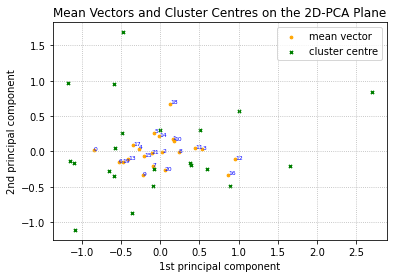

In [3]:
# Q3.2
def iaml01cw2_q3_2():
#
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    centers = kmeans.cluster_centers_

    Xmean = []
    for label in range(22):
        Xmean.append(np.mean(Xtrn[Ytrn==label], axis=0))

    pca = PCA(n_components=2).fit(Xmean)
    Xmean_pca = pca.transform(Xmean)
    centers_pca = pca.transform(centers)
    
    plt.title('Mean Vectors and Cluster Centres on the 2D-PCA Plane')
    plt.grid(linestyle=':')

    plt.scatter(Xmean_pca[:, 0], Xmean_pca[:, 1], color='orange', s=30, marker='.', label='mean vector')
    for i, xy in enumerate(zip(Xmean_pca[:, 0], Xmean_pca[:, 1])):
        plt.annotate(s=i, xy=xy, color='blue', size=6)

    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], color='green', s=10, marker='x', label='cluster centre')

    plt.legend()
    plt.xlabel('1st principal component')
    plt.ylabel('2nd principal component')
    plt.savefig('Q3_2.pdf')
    plt.show()

iaml01cw2_q3_2()   # comment this out when you run the function

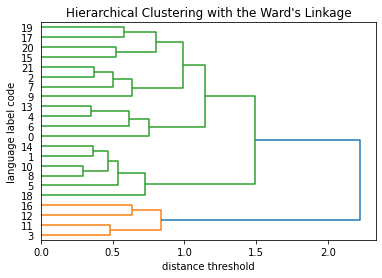

In [4]:
# Q3.3
def iaml01cw2_q3_3():
#
    Xmean = []
    for label in range(22):
        Xmean.append(np.mean(Xtrn[Ytrn==label], axis=0))
    
    plt.figure()
    Z = hierarchy.ward(Xmean)
    dn = hierarchy.dendrogram(Z, orientation='right')
    plt.title("Hierarchical Clustering with the Ward's Linkage")
    plt.xlabel('distance threshold')
    plt.ylabel('language label code')
    plt.savefig('Q3_3.pdf')
    plt.show()
    
iaml01cw2_q3_3()   # comment this out when you run the function

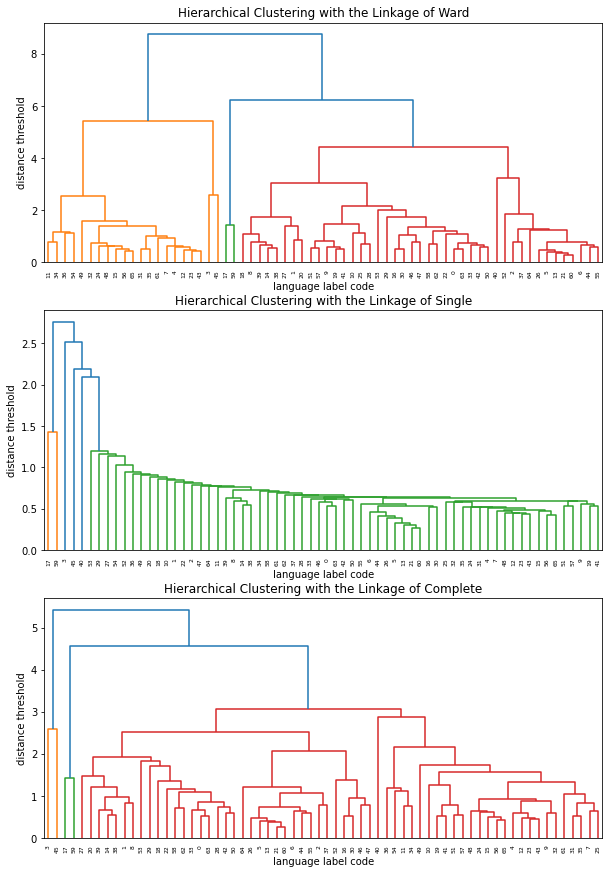

In [5]:
# Q3.4
def iaml01cw2_q3_4():
#
    centers = KMeans(n_clusters=3, random_state=1).fit(Xtrn[Ytrn==0]).cluster_centers_
    for label in range(1,22):
        kmeans = KMeans(n_clusters=3, random_state=1).fit(Xtrn[Ytrn==label])
        centers = np.r_[centers, kmeans.cluster_centers_]

    plt.figure(figsize=(10,15))

    plt.subplot(3,1,1)
    plt.title("Hierarchical Clustering with the Linkage of Ward")
    Z1 = hierarchy.ward(centers)
    dn1 = hierarchy.dendrogram(Z1)
    plt.xlabel('language label code')
    plt.ylabel('distance threshold')

    plt.subplot(3,1,2)
    plt.title("Hierarchical Clustering with the Linkage of Single")
    Z2 = hierarchy.single(centers)
    dn2 = hierarchy.dendrogram(Z2)
    plt.xlabel('language label code')
    plt.ylabel('distance threshold')

    plt.subplot(3,1,3)
    plt.title("Hierarchical Clustering with the Linkage of Complete")
    Z3 = hierarchy.complete(centers)
    dn3 = hierarchy.dendrogram(Z3)
    plt.xlabel('language label code')
    plt.ylabel('distance threshold')

    plt.savefig('Q3_4.pdf')
    plt.show()

iaml01cw2_q3_4()   # comment this out when you run the function

type:diag, K:1, train:14.280416117561785, test:13.842923924145325
type:diag, K:3, train:15.395173460705978, test:15.04006627821557
type:diag, K:5, train:16.010700457800564, test:15.890829861996654
type:diag, K:10, train:16.973002698028413, test:16.515995383612
type:diag, K:15, train:17.709439790818063, test:16.80468995665528
type:full, K:1, train:16.39360043614829, test:15.810511543142642
type:full, K:3, train:18.00597583492141, test:16.8108138760458
type:full, K:5, train:19.080568588852024, test:16.711311433091335
type:full, K:10, train:21.141366962316543, test:14.559425686277462
type:full, K:15, train:22.95547688174239, test:11.574547777461177


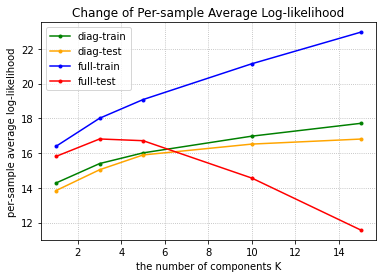

In [6]:
# Q3.5
def iaml01cw2_q3_5():
#
    train = Xtrn[Ytrn==0]
    test = Xtst[Ytst==0]
    covariance_type = ['diag', 'full']
    K = [1, 3, 5, 10, 15]
    train_score = []
    test_score = []

    for covariance in covariance_type:
        for k in K:
            gm = GaussianMixture(n_components=k, covariance_type=covariance, random_state=1).fit(train)
            train_score.append(gm.score(train))
            test_score.append(gm.score(test))
            print("type:{}, K:{}, train:{}, test:{}".format(covariance, k, train_score[-1], test_score[-1]))
    
    plt.title("Change of Per-sample Average Log-likelihood")
    plt.grid(linestyle=':')
    plt.plot(K, train_score[:5], marker='.', color='green', label='diag-train')
    plt.plot(K, test_score[:5], marker='.', color='orange', label='diag-test')
    plt.plot(K, train_score[5:], marker='.', color='blue', label='full-train')
    plt.plot(K, test_score[5:], marker='.', color='red', label='full-test')
    plt.legend()
    plt.xlabel('the number of components K')
    plt.ylabel('per-sample average log-likelihood')
    plt.savefig('Q3_5.pdf')
    plt.show()

iaml01cw2_q3_5()   # comment this out when you run the function

In [7]:
# Q3.6 
# The code for the following two functions should be the same one as you present in your report
def SimpleGMM_train(X, n_components):
#
    kmeans = KMeans(n_clusters=n_components, random_state=1).fit(X)
    Ms = kmeans.cluster_centers_
    
    Dcovs = []
    Pk = []
    
    for label in range(n_components): 
        Dcovs.append(np.diagonal(np.cov(X[kmeans.labels_==label].T)))
        Pk.append(np.sum(kmeans.labels_==label))
    
    return Ms, np.array(Dcovs), np.array(Pk/np.sum(Pk))


def SimpleGMM_eval(X, Ms, Dcovs, Pk):
#
    likelihood = []
    for x in X:
        res = 0
        for i in range(len(Ms)):
            mn = multivariate_normal.pdf(x, mean=Ms[i], cov=Dcovs[i])
            res += np.dot(mn, Pk[i])
        likelihood.append(np.log(res))

    return np.array(likelihood)

In [8]:
# Q3.7 
def iaml01cw2_q3_7():
#
    train = Xtrn[Ytrn==0]
    K = [1, 5, 10]

    for k in K:
        Ms, Dcovs, Pk = SimpleGMM_train(train, k)
        print(Pk)
    
iaml01cw2_q3_7()   # comment this out when you run the function

[1.]
[0.11088911 0.14885115 0.30969031 0.24675325 0.18381618]
[0.03896104 0.14385614 0.13886114 0.13186813 0.05994006 0.13586414
 0.08991009 0.08691309 0.13486513 0.03896104]


In [9]:
# Q3.8 
def iaml01cw2_q3_8():
#
    train = Xtrn[Ytrn==0]
    test = Xtst[Ytst==0]
    K = [1, 3, 5, 10, 15]

    for k in K:
        Ms, Dcovs, Pk = SimpleGMM_train(train, k)
        avg1 = np.mean(SimpleGMM_eval(train, Ms, Dcovs, Pk))
        avg2 = np.mean(SimpleGMM_eval(test, Ms, Dcovs, Pk))
        print("K:{}, train:{}, test:{}".format(k, avg1, avg2))
iaml01cw2_q3_8()   # comment this out when you run the function

K:1, train:14.280411039934718, test:13.843155206256206
K:3, train:15.235043324839143, test:14.93911392019021
K:5, train:15.798601828723383, test:15.580649484437696
K:10, train:16.617087467949148, test:16.301376007312907
K:15, train:17.319724050011345, test:16.992718468221085
